In [88]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

from utils import replace_punctuation_with_space
from graph import create_graph

In [29]:
# !pip install networkx scipy pygraphviz

In [2]:

# Open a file for writing
with open("../data/labels_per_category.json", "r") as f:
    # Write the dictionary to the file in JSON format
    ocms = json.load(f)

In [30]:
ocms[1]

{'information sources': [['111',
   'citations of documents in the hraf collection'],
  ['112', 'additional bibliography'],
  ['113', 'bibliographies in sources'],
  ['114', 'reviews and critiques'],
  ['115', 'informants'],
  ['116', 'complete texts of hraf documents'],
  ['117', 'field data'],
  ['118', 'fiction'],
  ['119', 'artifact and archive collections']]}

In [38]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(nodes):
    # Create an empty directed graph
    G = nx.DiGraph()

    # Add the root node
    G.add_node('OCMs')

    # Add children nodes
    # for i in range(1, num_nodes):
    for node in nodes:
        # print(node.items())
        key, values = list(node.items())[0]
        # parent = random.randint(0, i-1)
        G.add_node(key)
        G.add_edge('OCMs', key)
        for val in values:
            # G.add_edge(key, ' '.join(val))
            G.add_edge(key, val[1])

    # Draw the graph
    pos = nx.spiral_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


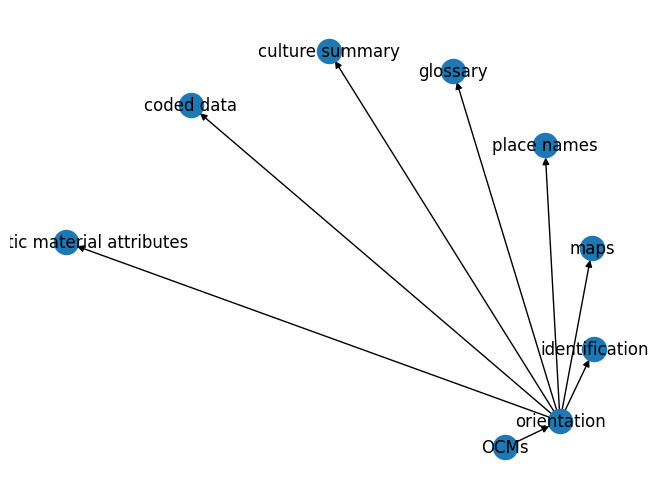

In [60]:
create_graph(ocms[:1])

In [90]:
def create_dot_graph(ocms):
    # Create an empty directed graph
    G = nx.DiGraph()

    # Add the root node
    root_node = 0
    G.add_node(root_node)

    # Generate the dot language string
    dot_str = 'digraph G {\n'
    dot_str += '\tnode [shape=rectangle, fontname="Arial"];\n'
    dot_str += '\tnodeOCMs [label="OCMs"];\n'

    # Add child nodes
    child_nodes = []
    for node in ocms:
        # print(node.items())
        key, values = list(node.items())[0]
        # parent = random.randint(0, i-1)
        dot_str += '\tnode{} [label="{}"];\n'.format(key, key)
        G.add_node(key)
        G.add_edge('OCMs', key)
        dot_str += '\tnode{} -> node{};\n'.format('OCMs', key)
        # print(key)
        for val in values:
            # G.add_edge(key, ' '.join(val))
            val[1] = replace_punctuation_with_space(val[1])
            dot_str += '\tnode{} -> {};\n'.format(key, '_'.join(val[1].split()))
            G.add_edge(key, val[1])

    dot_str += '}'

    return dot_str

# Example usage: create a dot language string with the given data
data = [{'KEY': [['ITEM1', 'ITEM2'], ['ITEM1', 'ITEM2']]}]
dot_str = create_dot_graph(ocms[:5])
print(dot_str)


digraph G {
	node [shape=rectangle, fontname="Arial"];
	nodeOCMs [label="OCMs"];
	nodeorientation [label="orientation"];
	nodeOCMs -> nodeorientation;
	nodeorientation -> identification;
	nodeorientation -> maps;
	nodeorientation -> place_names;
	nodeorientation -> glossary;
	nodeorientation -> culture_summary;
	nodeorientation -> coded_data;
	nodeorientation -> diagnostic_material_attributes;
	nodeinformation sources [label="information sources"];
	nodeOCMs -> nodeinformation sources;
	nodeinformation sources -> citations_of_documents_in_the_hraf_collection;
	nodeinformation sources -> additional_bibliography;
	nodeinformation sources -> bibliographies_in_sources;
	nodeinformation sources -> reviews_and_critiques;
	nodeinformation sources -> informants;
	nodeinformation sources -> complete_texts_of_hraf_documents;
	nodeinformation sources -> field_data;
	nodeinformation sources -> fiction;
	nodeinformation sources -> artifact_and_archive_collections;
	noderesearch methods [label="rese

In [12]:
df = pd.read_csv('data/fpsc_relevant_ocm.csv', encoding='utf-8')

In [13]:
df.head()

,section,title,culture,pub.date,field.date,byline,textrecord,ocms
0,aa01-008-000031,Quelpart and Dagelet,Korea,NaN,1933,[by] Hermann Lautensach,{{241}} {{311}} As a result of the porous qua...,241 311 171 412 221 243 231 249 242 248 137 24...
1,aa01-009-000032,Korean farming: contributions to the ethnology...,Korea,NaN,No date,[by] M. Heydrich,{{134}} {{241}} Tilling the fields is rendere...,134 241 311 177 245 313 137 764 132 312 173 17...
2,aa01-022-000282,The Koreans and their culture,Korea,1951,1947,[by] Cornelius Osgood,{{137}} {{245}} “Pines are the most striking ...,137 245 241 655 805 221 248 249 415 243 482 51...
3,aa01-049-000057,A history of the church in Korea: vol. 1,Korea,1874,No date,[by] Charles Dallet,"{{241}} {{231}} In the valleys, so long as th...",231 241 221 361 491 177 244 248 656 797 176 24...
4,aa01-049-005736,A history of the church in Korea: vol. 1,Korea,1874,No date,[by] Charles Dallet,{{855}} {{862}} {{462}} {{221}} {{562}} Wh...,221 462 562 855 862


In [14]:
# Basic statistics of the numerical columns
print(df.describe())

# Basic statistics of the non-numerical columns
print('\nnon-numerical columns: \n', df.describe(include=['O']))

# Count of unique values in the non-numerical columns
print(df.nunique())

                section                                              title  \
count              5218                                               5218   
unique             5218                                               1679   
top     aa01-008-000031  Herds of the tundra: a portrait of Saami reind...   
freq                  1                                                 63   

        culture pub.date field.date            byline  \
count      5218     5044       5218              5217   
unique      308      267        845              1482   
top     Turkana     1994    no date  Cornelius Osgood   
freq        178      142        589                87   

                                               textrecord  ocms  
count                                                5218  5218  
unique                                               5218  4878  
top     {{241}}  {{311}} As a result of the porous qua...   221  
freq                                                    1  

In [25]:

# Convert the pub.date column to numeric
df['pub.date'] = pd.to_numeric(df['pub.date'], errors='coerce')

# Convert the field.date column to numeric
df['field.date'] = pd.to_numeric(df['field.date'], errors='coerce')


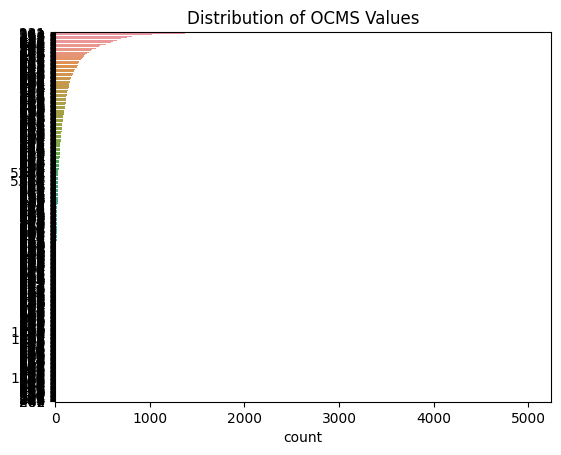

In [31]:

# Count the occurrences of values in each row for the ocms column
ocms_counts = df['ocms'].str.split(expand=True).stack().value_counts()

# Plot the distribution of ocms values
sns.countplot(y=df['ocms'].str.split(expand=True).stack(), order=ocms_counts.index)
plt.title("Distribution of OCMS Values")
plt.show()

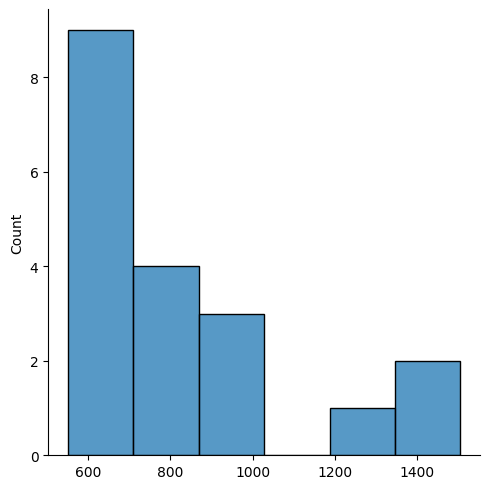

In [40]:
sns.displot(ocms_counts[1:20], )

In [16]:

# Plot the distribution of the culture target variable
sns.barplot(x="culture", data=df)
plt.title("Distribution of Culture")
plt.show()

# Plot the correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Plot a histogram of the publication dates
sns.histplot(x="pub.date", data=df)
plt.title("Distribution of Publication Dates")
plt.show()

# Plot a scatter plot of field date versus publication date
sns.scatterplot(x="field.date", y="pub.date", data=df)
plt.title("Field Date vs. Publication Date")
plt.show()

# Create a box plot of text record length by culture
sns.boxplot(x="culture", y="textrecord", data=df)
plt.title("Text Record Length by Culture")
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.